In [1]:
import os
import sys
from PIL import Image

In [2]:
# Guarantee that the models folder exists in the path
DIR = os.path.abspath('../model')
sys.path.append(os.path.dirname(DIR))

In [3]:
from model.image_generator import *

In [4]:
# Available Image generators
IMAGE_GENERATORS

frozenset({'CompVis/stable-diffusion-v1-4',
           'runwayml/stable-diffusion-v1-5',
           'stabilityai/stable-diffusion-2-1',
           'stabilityai/stable-diffusion-2-1-base'})

In [5]:
# Load/Download (all) the Pretrained Image Generators
img_generators = list()
for img_gen in IMAGE_GENERATORS:
    print(img_gen)
    img_generators.append(load_image_generator(img_gen))

stabilityai/stable-diffusion-2-1


Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

CompVis/stable-diffusion-v1-4


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.


stabilityai/stable-diffusion-2-1-base


Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

runwayml/stable-diffusion-v1-5


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

In [6]:
# Name and Device of each Model
for img_gen in img_generators:
    print(img_gen.model_name,img_gen.device)

stabilityai/stable-diffusion-2-1 cpu
CompVis/stable-diffusion-v1-4 cpu
stabilityai/stable-diffusion-2-1-base cpu
runwayml/stable-diffusion-v1-5 cpu


In [7]:
# Move Them to GPU
for img_gen in img_generators:
    img_gen.to(torch.device('cuda'))
    print(img_gen.model_name,img_gen.device)

stabilityai/stable-diffusion-2-1 cuda:0
CompVis/stable-diffusion-v1-4 cuda:0
stabilityai/stable-diffusion-2-1-base cuda:0
runwayml/stable-diffusion-v1-5 cuda:0


In [15]:
def text_to_image(prompt, img_generators):
    imgs = list()
    for img_gen in img_generators:
        imgs.append(img_gen.generate_image(prompt=prompt))
    return imgs

In [16]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [17]:
# Generate as many prompts as the number of image generators
prompt = "a photograph of an astronaut riding a horse"

In [19]:
imgs = text_to_image(prompt, img_generators)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Images in the order of the following generators
['stabilityai/stable-diffusion-2-1', 'CompVis/stable-diffusion-v1-4', 'stabilityai/stable-diffusion-2-1-base', 'runwayml/stable-diffusion-v1-5']


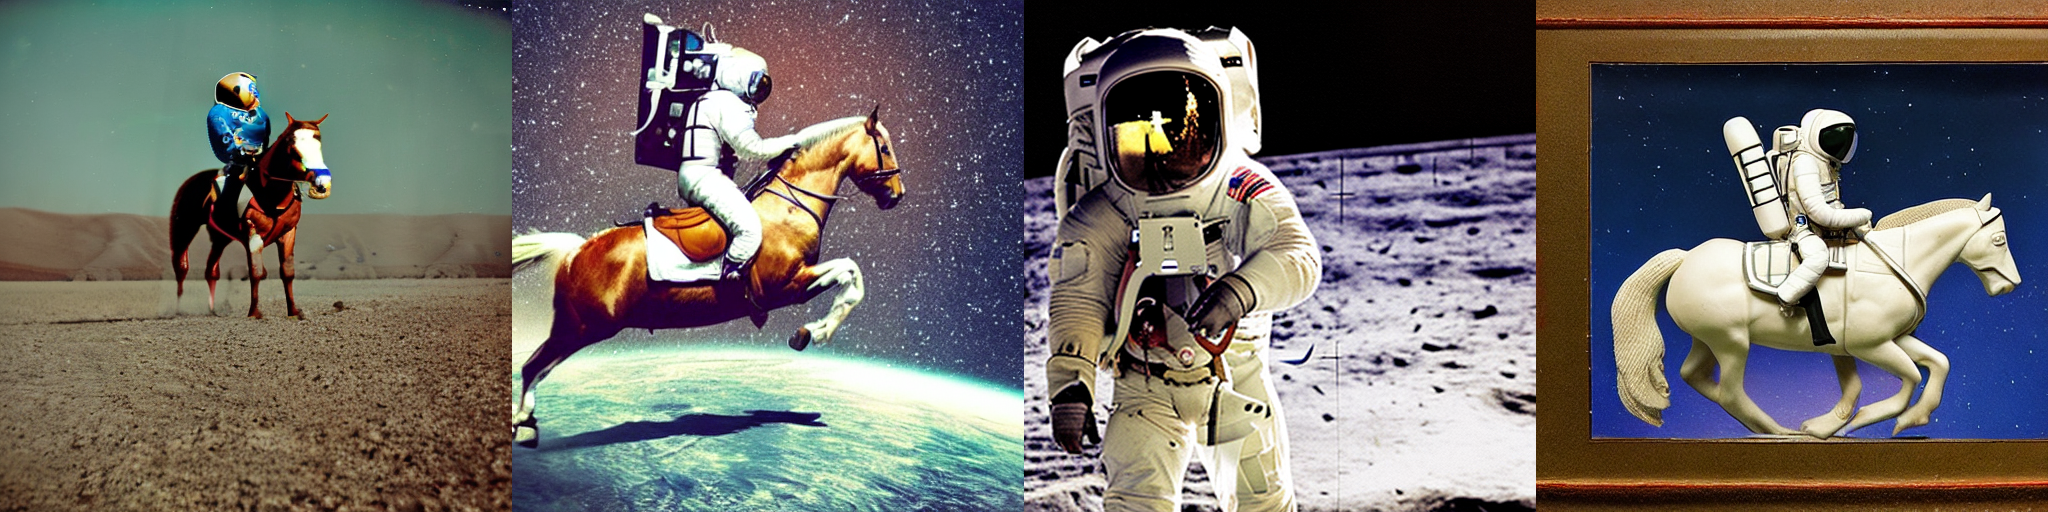

In [22]:
print('Images in the order of the following generators')
print([ig.model_name for ig in img_generators])
image_grid(imgs, rows=1, cols=4)